# Import module

In [1]:
import scvi
import anndata
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

scvi.settings.seed = 420

Global seed set to 0
/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)
Global seed set to 420


# Read in data

In [2]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/8regions/ArchR/project_output/PeakMatrix/Adult_Peaks.h5ad')
adata

AnnData object with n_obs × n_vars = 139835 × 429828
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'batch_key', 'cell_type', 'cell_state'

In [3]:
adata.X.data[:10]

array([2., 2., 2., 1., 1., 2., 2., 2., 2., 2.], dtype=float32)

# Setup anndata for scVI

In [4]:
scvi.model.PEAKVI.setup_anndata(adata, batch_key="donor")

In [5]:
pvi = scvi.model.PEAKVI(adata)
pvi.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:267: LightningDeprecationWarning: The `Callback.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_end` instead.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 62/500:  12%|██████████████▉                                                                                                         | 62/500 [7:02:06<49:42:01, 408.50s/it, loss=3.78e+08, v_num=1]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 26050.670. Signaling Trainer to stop.


In [6]:
latent = pvi.get_latent_representation()
adata.obsm["X_PeakVI"] = latent

print(latent.shape)

(139835, 25)


In [7]:
adata.write('/nfs/team205/heart/anndata_objects/8regions/ArchR/project_output/PeakMatrix/Adult_Peaks_post-peakVI.h5ad')

In [8]:
pvi.save('/nfs/team205/heart/anndata_objects/8regions/ArchR/project_output/PeakMatrix/Adult_peakVI-model', overwrite=True)

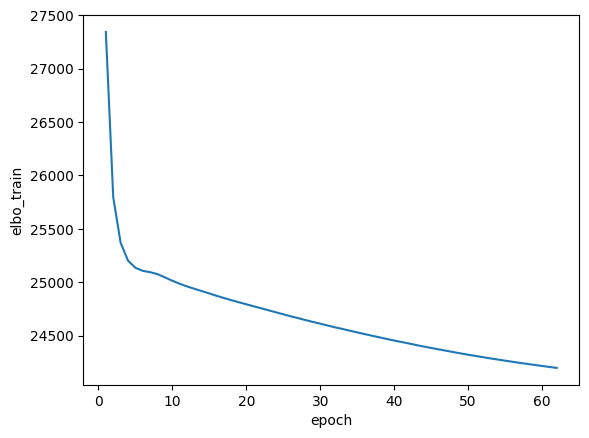

<Figure size 640x480 with 0 Axes>

In [9]:
# Convergence plot
x = np.linspace(1, (len(pvi.history['elbo_train'])), (len(pvi.history['elbo_train'])))
plt.plot(x, pvi.history['elbo_train'], label="train")
# plt.title(reg)
plt.xlabel('epoch')
plt.ylabel('elbo_train')
plt.show()
plt.clf()